In [6]:
import warnings
import torch
from molecule import MoleculeTrainer
from gflownet.config import init_empty, Config
from rdkit.Chem.Draw import MolsToGridImage
import pathlib

Skipped loading some Tensorflow models, missing a dependency. No module named 'tensorflow'
wandb: WARNING W&B installed but not logged in.  Run `wandb login` or set the WANDB_API_KEY env variable.
Skipped loading modules with transformers dependency. No module named 'transformers'
cannot import name 'HuggingFaceModel' from 'deepchem.models.torch_models' (c:\Users\paulj\Desktop\prosjekt\pom_cpu-model\venv\lib\site-packages\deepchem\models\torch_models\__init__.py)
Skipped loading modules with pytorch-lightning dependency, missing a dependency. No module named 'lightning'
Skipped loading some Jax models, missing a dependency. No module named 'jax'
Skipped loading some PyTorch models, missing a dependency. No module named 'tensorflow'


In [4]:
from rdkit.Chem import MolFromSmiles, SanitizeMol, SanitizeFlags
from rdkit.Chem.rdchem import Mol as RDMol
from rdkit import Chem

def is_valid_molecule(mol: RDMol) -> bool:
    try:
        SanitizeMol(mol, sanitizeOps=SanitizeFlags.SANITIZE_ALL)
        return True
    except Exception:
        return False

In [5]:
weird_smiles =	"[H][P](F)(#C)(#N)S1(ONS1)=[S]NS"
weird_mol=Chem.MolFromSmiles(weird_smiles)
weird_mol

[13:06:02] Explicit valence for atom # 0 P, 9, is greater than permitted


In [36]:
config = init_empty(Config())
dev = torch.device('cpu')
config.print_every = 1
config.log_dir = f"teeeest"
config.device = dev
config.num_training_steps = 1
config.num_workers = 0
config.num_validation_gen_steps = 1
config.overwrite_existing_exp=True
config.checkpoint_every = 100
config.algo.max_nodes = 12 # 95 quantil
config.store_all_checkpoints = True
vanillin_smiles = ["COc1cc(C=O)ccc1O"]
trial = MoleculeTrainer(config,vanillin_smiles, print_config=True)
trial.run()

c:\Users\paulj\Desktop\prosjekt\pom_cpu-model\venv\lib\site-packages\deepchem\models\torch_models\torch_model.py:1078: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = t



Hyperparameters:

desc: noDesc
log_dir: teeeest
device: cpu
seed: 0
validate_every: 1000
checkpoint_every: 100
store_all_checkpoints: true
print_every: 1
start_at_step: 0
num_final_gen_steps: null
num_validation_gen_steps: 1
num_training_steps: 1
num_workers: 0
hostname: null
pickle_mp_messages: false
git_hash: f106cde
overwrite_existing_exp: true
algo:
  method: TB
  num_from_policy: 64
  num_from_dataset: 0
  valid_num_from_policy: 64
  valid_num_from_dataset: 0
  max_len: 128
  max_nodes: 12
  max_edges: 128
  illegal_action_logreward: -1.0
  train_random_action_prob: 0.0
  train_det_after: null
  valid_random_action_prob: 0.0
  sampling_tau: 0.9
  tb:
    bootstrap_own_reward: false
    epsilon: null
    reward_loss_multiplier: 1.0
    variant: TB
    do_correct_idempotent: false
    do_parameterize_p_b: false
    do_predict_n: false
    do_sample_p_b: false
    do_length_normalize: false
    subtb_max_len: 128
    Z_learning_rate: 0.0001
    Z_lr_decay: 50000.0
    cum_subtb: tr

c:\Users\paulj\Desktop\prosjekt\pom_cpu-model\venv\lib\site-packages\deepchem\models\torch_models\torch_model.py:1078: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = t

16/11/2024 13:33:37 - INFO - logger - iteration 1 : offline_loss:0.00 online_loss:456.18 reward_loss:0.00 invalid_trajectories:0.00 invalid_logprob:0.00 invalid_losses:0.00 backward_vs_unif:0.00 logZ:0.00 loss:456.18 n_loss:0.00 tb_loss:456.18 batch_entropy:38.56 traj_lens:12.61 grad_norm:695.86 grad_norm_clip:77.67 sampled_reward_avg:0.33 train_time:3.16 time_spent:19.38


c:\Users\paulj\Desktop\prosjekt\pom_cpu-model\venv\lib\site-packages\deepchem\models\torch_models\torch_model.py:1078: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = t

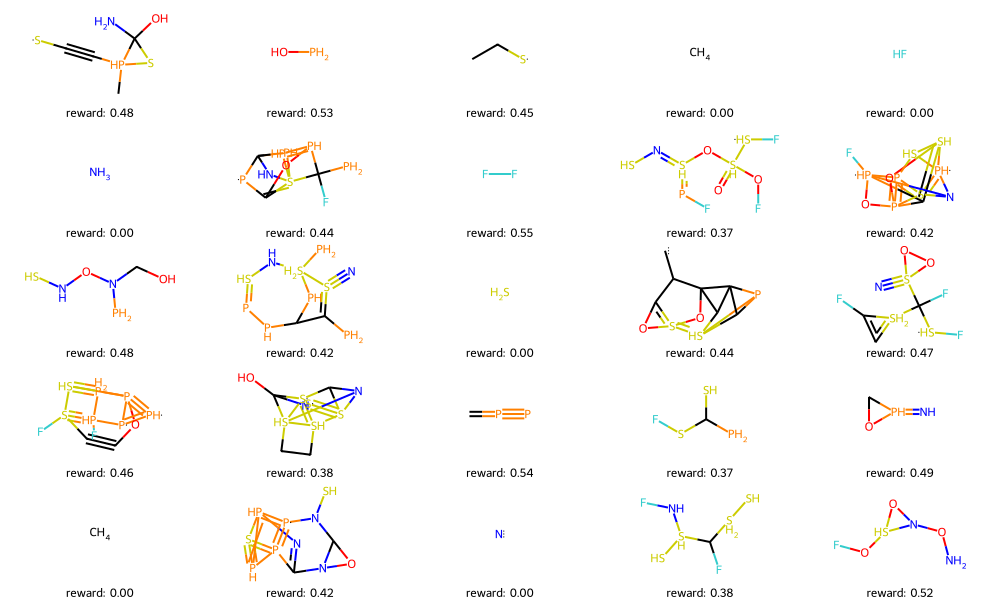

In [37]:
# Generate molecules
trajs = trial.algo.create_training_data_from_own_samples(trial.model, 25)
objs = [trial.ctx.graph_to_obj(i['result']) for i in trajs]
obj_props, _ = trial.task.compute_obj_properties(objs)
log_rewards = trial.task.cond_info_to_logreward({'beta': torch.ones(len(trajs))}, obj_props)
MolsToGridImage(objs[:25], molsPerRow=5, subImgSize=(200, 120), legends=[f'reward: {r.exp().item():.2f}' for r in log_rewards[:25]])

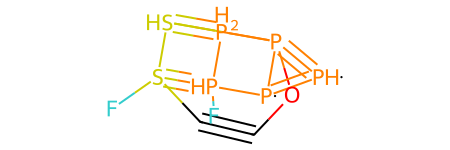

In [43]:
objs[15]

In [42]:
weirdmol = objs[15]
is_valid_molecule(weirdmol)

True

In [46]:
Chem.MolToSmiles(weirdmol)

'F[PH]12#S3(F)C#COP45(#[PH]=[P]14)[PH2]2#[SH]35'

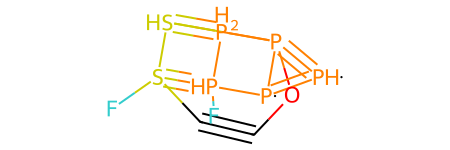

In [45]:
Chem.MolFromSmiles(Chem.MolToSmiles(weirdmol))

In [62]:
def is_chemically_realistic(mol):
    for atom in mol.GetAtoms():
        # Retrieve the atomic number and degree (number of bonds)
        atomic_num = atom.GetAtomicNum()
        valence = atom.GetExplicitValence() + atom.GetImplicitValence()
        # Add custom checks for phosphorus and other elements
        if atomic_num == 15:  # Atomic number for Phosphorus
            if valence > 5:  # P cannot exceed pentavalency
                return False
    return True


    
def has_unpaired_electrons(mol):
    """
    Check if a molecule has unpaired electrons (radicals).
    Args:
        mol (RDKit Mol): Molecule to check.
    Returns:
        bool: True if there are unpaired electrons, False otherwise.
    """
    for atom in mol.GetAtoms():
        if atom.GetNumRadicalElectrons() > 0:
            return True
    return False

def is_valid_molecule(mol):
    try:
        # Standard RDKit sanitization
        Chem.SanitizeMol(mol, sanitizeOps=SanitizeFlags.SANITIZE_ALL)
        # Check for unpaired electrons
        if has_unpaired_electrons(mol):
            return False
        # Additional chemical realism checks
        if not is_chemically_realistic(mol):
            return False
        return True
    except Exception:
        return False

In [65]:
is_valid_molecule(weirdmol)
has_unpaired_electrons(weirdmol)
valid = [is_valid_molecule(i) for i in objs]

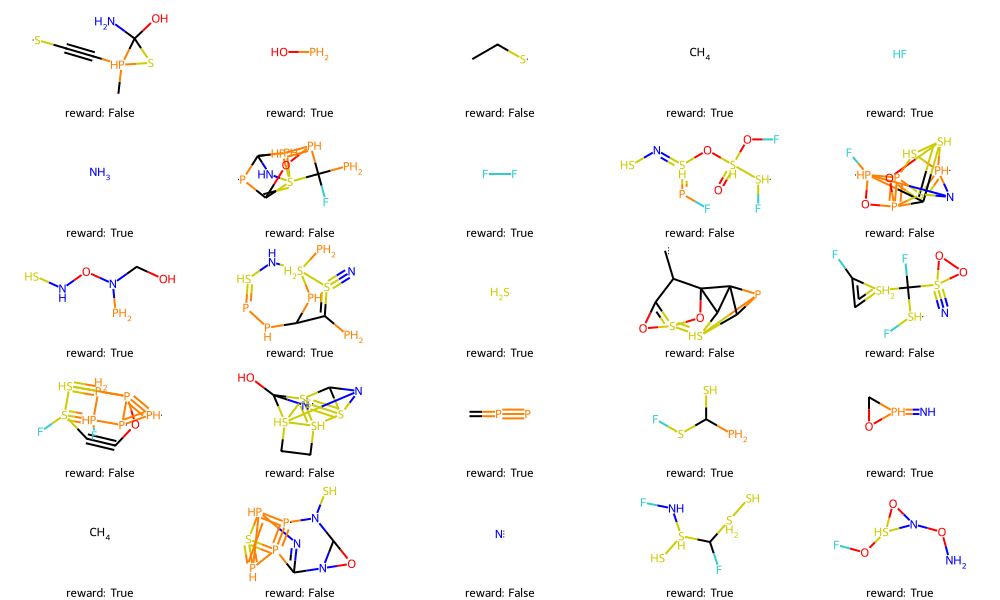

In [66]:
#obj_props, _ = trial.task.compute_obj_properties(objs)
#log_rewards = trial.task.cond_info_to_logreward({'beta': torch.ones(len(trajs))}, obj_props)
MolsToGridImage(objs[:25], molsPerRow=5, subImgSize=(200, 120), legends=[f'reward: {r}' for r in valid[:25]])

In [20]:
gr = trial.ctx.obj_to_graph(Chem.MolFromSmiles(vanillin_smiles[0]))
gr

<[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], [(0, 1), (1, 2), (2, 3), (2, 9), (3, 4), (4, 5), (4, 7), (5, 6), (7, 8), (8, 9), (9, 10)], ['C', 'O', 'C', 'C', 'C', 'C', 'O', 'C', 'C', 'C', 'O']>

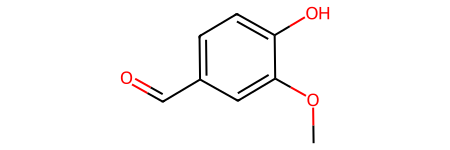

In [18]:
Chem.MolFromSmiles(vanillin_smiles[0])

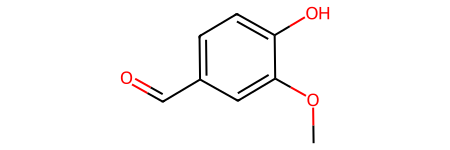

In [23]:
trial.ctx.graph_to_obj(gr)

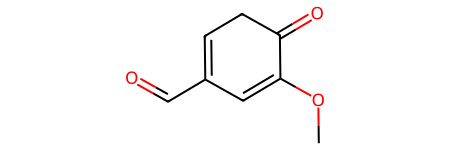

In [24]:
	
Chem.MolFromSmiles("COC1=CC(C=O)=CCC1=O")

In [31]:
gr2=trial.ctx.obj_to_graph(Chem.MolFromSmiles("COC1=CC(C=O)=CCC1=O"))
gr2

<[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], [(0, 1), (1, 2), (2, 3), (2, 9), (3, 4), (4, 5), (4, 7), (5, 6), (7, 8), (8, 9), (9, 10)], ['C', 'O', 'C', 'C', 'C', 'C', 'O', 'C', 'C', 'C', 'O']>

In [26]:
gr

<[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], [(0, 1), (1, 2), (2, 3), (2, 9), (3, 4), (4, 5), (4, 7), (5, 6), (7, 8), (8, 9), (9, 10)], ['C', 'O', 'C', 'C', 'C', 'C', 'O', 'C', 'C', 'C', 'O']>

In [30]:
gr==gr2

False

In [34]:
type(gr)

gflownet.envs.graph_building_env.Graph

In [35]:
from gflownet.envs.graph_building_env import Graph


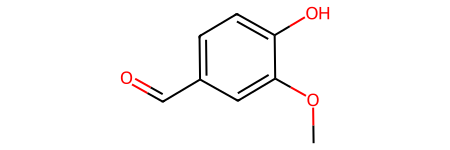

In [33]:
trial.ctx.graph_to_obj(gr)

In [14]:
import warnings
import torch
from molecule import MoleculeTrainer
from gflownet.config import init_empty, Config
from rdkit.Chem.Draw import MolsToGridImage
import gflownet

In [15]:
# Model class must be defined somewhere
state = torch.load("./openpom_cossim_2024-11-08__14_12_03/model_final_save.pt", weights_only=False)
#model = statemodel.eval()
state["models_state_dict"]

[OrderedDict([('transf.x2h.0.weight',
               tensor([[ 0.0573,  0.1892,  0.0822,  ...,  0.0169, -0.1294, -0.0145],
                       [-0.1080, -0.0919,  0.1273,  ...,  0.0041, -0.0130,  0.2119],
                       [-0.0859,  0.1299,  0.1043,  ...,  0.1796, -0.1538, -0.1925],
                       ...,
                       [-0.1227, -0.1926,  0.1884,  ..., -0.2141,  0.0912, -0.1903],
                       [ 0.0878, -0.1715,  0.0959,  ...,  0.0618, -0.0801, -0.1779],
                       [-0.2038, -0.0096, -0.2170,  ..., -0.0031,  0.0513, -0.0752]])),
              ('transf.x2h.0.bias',
               tensor([-0.2051, -0.1816, -0.0795,  0.1948,  0.0645,  0.0673, -0.1403, -0.0860,
                        0.0429, -0.0263,  0.1342,  0.1513,  0.1315,  0.1246, -0.1522, -0.0586,
                       -0.1278,  0.0217, -0.1248,  0.1487, -0.2035,  0.0592,  0.0398,  0.1058,
                        0.0755, -0.1323, -0.0819,  0.1145, -0.1877, -0.1885,  0.1791,  0.1240,
     

In [16]:
model = gflownet.models.graph_transformer.GraphTransformerGFN(state["env_ctx"],state["cfg"])
model.load_state_dict(state["models_state_dict"][0])
model.eval()

GraphTransformerGFN(
  (transf): GraphTransformer(
    (x2h): Sequential(
      (0): Linear(in_features=21, out_features=128, bias=True)
      (1): LeakyReLU(negative_slope=0.01)
      (2): Linear(in_features=128, out_features=128, bias=True)
      (3): LeakyReLU(negative_slope=0.01)
      (4): Linear(in_features=128, out_features=128, bias=True)
    )
    (e2h): Sequential(
      (0): Linear(in_features=3, out_features=128, bias=True)
      (1): LeakyReLU(negative_slope=0.01)
      (2): Linear(in_features=128, out_features=128, bias=True)
      (3): LeakyReLU(negative_slope=0.01)
      (4): Linear(in_features=128, out_features=128, bias=True)
    )
    (c2h): Sequential(
      (0): Linear(in_features=1, out_features=128, bias=True)
      (1): LeakyReLU(negative_slope=0.01)
      (2): Linear(in_features=128, out_features=128, bias=True)
      (3): LeakyReLU(negative_slope=0.01)
      (4): Linear(in_features=128, out_features=128, bias=True)
    )
    (graph2emb): ModuleList(
      (0):

In [17]:
trial = MoleculeTrainer(state["cfg"],"", print_config=True)

AssertionError: 

In [52]:
from torch_geometric.data import Batch, Data

def mol_to_graph_backend(atmfeat, coord, bond, bondfeat, props={}, data_cls=Data):
    "convert to PyTorch geometric module"
    natm = atmfeat.shape[0]
    # transform to torch_geometric bond format; send edges both ways; sort bonds
    atmfeat = torch.tensor(atmfeat, dtype=torch.float32)
    if bond.shape[0] > 0:
        edge_index = torch.tensor(np.concatenate([bond.T, np.flipud(bond.T)], axis=1), dtype=torch.int64)
        edge_attr = torch.tensor(np.concatenate([bondfeat, bondfeat], axis=0), dtype=torch.float32)
        edge_index, edge_attr = coalesce(edge_index, edge_attr, natm, natm)
    else:
        edge_index = torch.zeros((0, 2), dtype=torch.int64)
        edge_attr = torch.tensor(bondfeat, dtype=torch.float32)

    # make torch data
    if coord is not None:
        coord = torch.tensor(coord, dtype=torch.float32)
        data = data_cls(x=atmfeat, pos=coord, edge_index=edge_index, edge_attr=edge_attr, **props)
    else:
        data = data_cls(x=atmfeat, edge_index=edge_index, edge_attr=edge_attr, **props)
    return data

In [55]:
NUM_ATOMIC_NUMBERS=6
def mol2graph(mol, floatX=torch.float, bonds=False, nblocks=False):
    rdmol = mol
    if rdmol is None:
        g = Data(
            x=torch.zeros((1, 14 + NUM_ATOMIC_NUMBERS)),
            edge_attr=torch.zeros((0, 4)),
            edge_index=torch.zeros((0, 2)).long(),
        )
    else:
        atmfeat, _, bond, bondfeat = mpnn_feat(mol, ifcoord=False, one_hot_atom=True, donor_features=False)
        g = mol_to_graph_backend(atmfeat, None, bond, bondfeat)
    stem_mask = torch.zeros((g.x.shape[0], 1))
    g.x = torch.cat([g.x, stem_mask], 1).to(floatX)
    g.edge_attr = g.edge_attr.to(floatX)
    if g.edge_index.shape[0] == 0:
        g.edge_index = torch.zeros((2, 1)).long()
        g.edge_attr = torch.zeros((1, g.edge_attr.shape[1])).to(floatX)
    return g

In [56]:
mol2graph(weird_mol)

Data(x=[1, 21], edge_index=[2, 1], edge_attr=[1, 4])

In [61]:
from gflownet import GFNTask, LogScalar, ObjectProperties


def compute_obj_properties(mols):
        graphs = [mol2graph(i) for i in mols]
        is_valid = torch.tensor([i is not None for i in graphs]).bool()
        if not is_valid.any():
            return ObjectProperties(torch.zeros((0, 1))), is_valid
            print(1)
        return is_valid
        #preds = compute_reward_from_graph(graphs).reshape((-1, 1))
        #assert len(preds) == is_valid.sum()
        #return ObjectProperties(preds), is_valid
compute_obj_properties([weird_mol])

tensor([True])